A company is organizing a meeting and has a list of n employees, waiting to be invited. They have arranged for a large circular table, capable of seating any number of employees.

The employees are numbered from 0 to n - 1. Each employee has a favorite person and they will attend the meeting only if they can sit next to their favorite person at the table. The favorite person of an employee is not themself.

Given a 0-indexed integer array favorite, where favorite[i] denotes the favorite person of the ith employee, return the maximum number of employees that can be invited to the meeting.

 

Example 1:

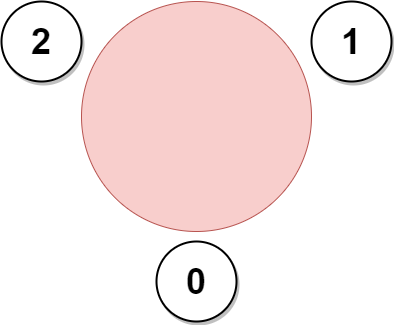

Input: favorite = [2,2,1,2]
Output: 3
Explanation:
The above figure shows how the company can invite employees 0, 1, and 2, and seat them at the round table.
All employees cannot be invited because employee 2 cannot sit beside employees 0, 1, and 3, simultaneously.
Note that the company can also invite employees 1, 2, and 3, and give them their desired seats.
The maximum number of employees that can be invited to the meeting is 3. 

Example 2:

Input: favorite = [1,2,0]
Output: 3
Explanation: 
Each employee is the favorite person of at least one other employee, and the only way the company can invite them is if they invite every employee.
The seating arrangement will be the same as that in the figure given in example 1:
- Employee 0 will sit between employees 2 and 1.
- Employee 1 will sit between employees 0 and 2.
- Employee 2 will sit between employees 1 and 0.
The maximum number of employees that can be invited to the meeting is 3.

Example 3:

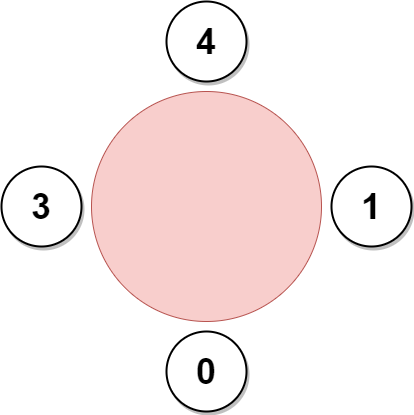

Input: favorite = [3,0,1,4,1]
Output: 4
Explanation:
The above figure shows how the company will invite employees 0, 1, 3, and 4, and seat them at the round table.
Employee 2 cannot be invited because the two spots next to their favorite employee 1 are taken.
So the company leaves them out of the meeting.
The maximum number of employees that can be invited to the meeting is 4.

 

Constraints:

    n == favorite.length
    2 <= n <= 105
    0 <= favorite[i] <= n - 1
    favorite[i] != i



In [ ]:
class Solution:
    def maximumInvitations(self, favorite: List[int]) -> int:
        n = len(favorite)
        in_degree = [0] * n

        # Calculate in-degree for each node
        for person in range(n):
            in_degree[favorite[person]] += 1

        # Topological sorting to remove non-cycle nodes
        q = deque()
        for person in range(n):
            if in_degree[person] == 0:
                q.append(person)
        depth = [1] * n  # Depth of each node

        while q:
            current_node = q.popleft()
            next_node = favorite[current_node]
            depth[next_node] = max(depth[next_node], depth[current_node] + 1)
            in_degree[next_node] -= 1
            if in_degree[next_node] == 0:
                q.append(next_node)

        longest_cycle = 0
        two_cycle_invitations = 0

        # Detect cycles
        for person in range(n):
            if in_degree[person] == 0:  # Already processed
                continue

            cycle_length = 0
            current = person
            while in_degree[current] != 0:
                in_degree[current] = 0  # Mark as visited
                cycle_length += 1
                current = favorite[current]

            if cycle_length == 2:
                # For 2-cycles, add the depth of both nodes
                two_cycle_invitations += depth[person] + depth[favorite[person]]
            else:
                longest_cycle = max(longest_cycle, cycle_length)

        return max(longest_cycle, two_cycle_invitations)